<a href="https://colab.research.google.com/github/MahaashreeAnburaj/FOML_labs/blob/main/expt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn


import seaborn as sns
import pylab
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats import diagnostic as diag

In [ ]:
df = pd.read_csv('sample_data/icecreamcone.csv')
df.set_index('codeNum', inplace = True) #change the index column to month number
df.head()

,moisture,protein,ash,viscosity
codeNum,,,,
1,13.5,6.50,0.306,37
2,13.3,7.45,0.300,51
3,12.7,9.45,0.405,66
4,11.7,12.05,0.940,15
5,12.7,6.25,0.277,30


In [ ]:
df.dtypes


,0
moisture,float64
protein,float64
ash,float64
viscosity,int64


In [ ]:
df = df.astype(float)
df.dtypes

,0
moisture,float64
protein,float64
ash,float64
viscosity,float64


Check any null value:

In [ ]:

df.isna().any()

,0
moisture,False
protein,False
ash,False
viscosity,False


## Printing correlation matrix of df
- to check multicollinearity

In [ ]:
corr = df.corr()
corr

,moisture,protein,ash,viscosity
moisture,1.000000,-0.567785,-0.603940,0.311619
protein,-0.567785,1.000000,0.856497,-0.094661
ash,-0.603940,0.856497,1.000000,-0.508807
viscosity,0.311619,-0.094661,-0.508807,1.000000


##Plot heat map
to have an idea about correlation of variables in dataset

<Axes: >

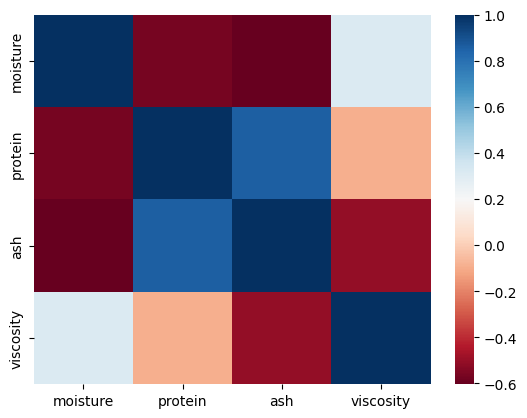

In [ ]:
sns.heatmap(corr, xticklabels= corr.columns, yticklabels=corr.columns, cmap = 'RdBu')

Ash and protein have highestcorr (1)

In [ ]:
df_before = df
x1 = df_before.drop('viscosity', axis = 1)

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif['features'] = x1.columns
display(vif)

,VIF Factor,features
0,39.806216,moisture
1,82.826964,protein
2,14.559671,ash


In [ ]:
df_after = df.drop('protein', axis = 1)
x2 = df_after.drop('viscosity',axis = 1)

vif1 = pd.DataFrame()
vif1['VIF Factor'] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
vif1['features'] = x2.columns
display(vif1)

,VIF Factor,features
0,3.170555,moisture
1,3.170555,ash


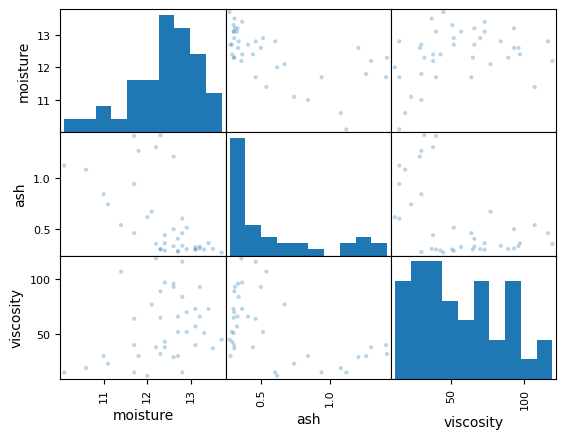

In [ ]:
pd.plotting.scatter_matrix(df_after, alpha=0.3)
plt.show()

In [ ]:
desc_df = df.describe()

Adding standard deviation metric


In [ ]:
desc_df.loc['+3std'] = desc_df.loc['mean'] + (desc_df.loc['std']*3)
desc_df.loc['-3std'] = desc_df.loc['mean'] - (desc_df.loc['std']*3)
desc_df

,moisture,protein,ash,viscosity
count,39.000000,39.000000,39.000000,39.000000
mean,12.394872,9.720513,0.576154,56.179487
std,0.798007,1.954439,0.362758,30.026192
min,10.100000,6.250000,0.270000,12.000000
25%,12.050000,8.325000,0.305500,31.000000
50%,12.600000,9.350000,0.405000,52.000000
75%,12.900000,10.875000,0.705000,75.000000
max,13.700000,13.900000,1.416000,119.000000
+3std,14.788893,15.583829,1.664429,146.258063
-3std,10.000851,3.857196,-0.512121,-33.899089


{'whiskers': [<matplotlib.lines.Line2D at 0x7e6ba3d1e350>,
 'caps': [<matplotlib.lines.Line2D at 0x7e6ba3d1fd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e6ba3d1e380>],
 'medians': [<matplotlib.lines.Line2D at 0x7e6ba3d1df30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e6ba3d1df00>],
 'means': []}

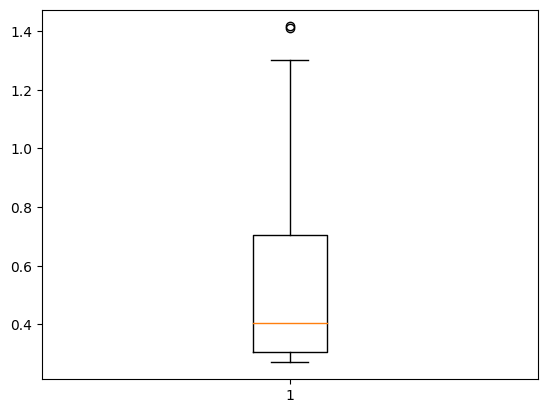

In [ ]:
d1 = df['ash']
plt.boxplot(d1)

{'whiskers': [<matplotlib.lines.Line2D at 0x7e6ba391fb50>,
 'caps': [<matplotlib.lines.Line2D at 0x7e6ba391dbd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e6ba391d150>],
 'medians': [<matplotlib.lines.Line2D at 0x7e6ba391e260>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e6ba3adc9d0>],
 'means': []}

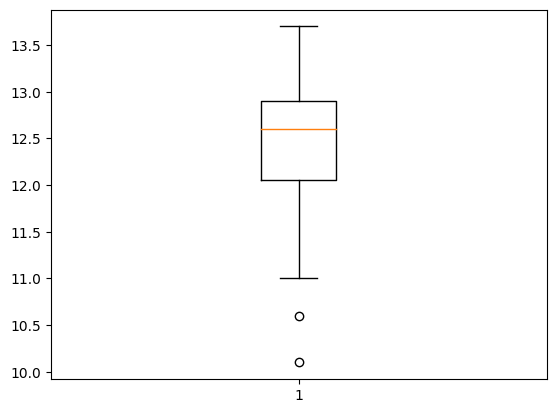

In [ ]:
d2 = df['moisture']
plt.boxplot(d2)

## Building Model

In [ ]:
x = df.drop(['viscosity','protein'], axis=1)
y = df[['viscosity']]
x

,moisture,ash
codeNum,,
1,13.5,0.306
2,13.3,0.300
3,12.7,0.405
4,11.7,0.940
5,12.7,0.277
6,12.7,0.287
7,12.4,0.290
8,12.3,0.300
9,13.1,0.298


In [ ]:
lm = sm.add_constant(x)

In [ ]:
result = sm.OLS(y, lm).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              viscosity   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     6.289
Date:                Fri, 06 Sep 2024   Prob (F-statistic):            0.00455
Time:                        05:50:03   Log-Likelihood:                -181.67
No. Observations:                  39   AIC:                             369.3
Df Residuals:                      36   BIC:                             374.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.0691     89.503      0.861      0.395    -104.450     258.589
moisture       0.2565      6.773      0.038      0.970     -13.480      13.993
ash          -41.7742     14.900     -2.804      0.008     -71.993     -11.555
==============================================================================
Omnibus:                        1.606   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.448   Jarque-Bera (JB):                1.500
Skew:                           0.374   Prob(JB):                        0.472
Kurtosis:                       2.398   Cond. No.                         265.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking autocorrelation
Ljung - Box test

In [ ]:
from statsmodels.stats.stattools import durbin_watson

In [ ]:
test_results = diag.acorr_ljungbox(result.resid)
print(test_results)

    lb_stat  lb_pvalue
1  1.601851   0.205641
2  2.134287   0.343990
3  3.980051   0.263626
4  4.128588   0.388883
5  4.538641   0.474730
6  4.634812   0.591428
7  6.416905   0.491997


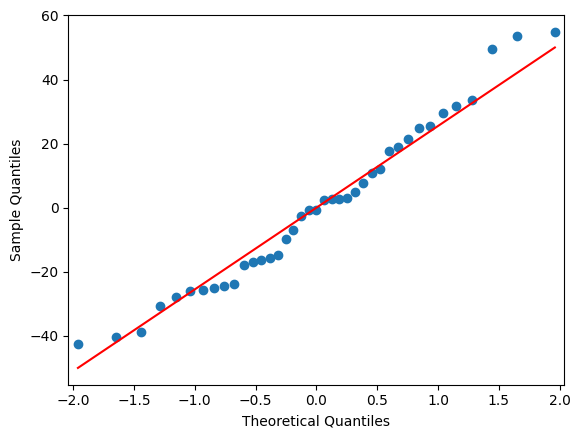

-6.558856022400925e-15


In [ ]:
sm.qqplot(result.resid, line = 's')
pylab.show()

mean_residuals = sum(result.resid)/len(result.resid)
print(mean_residuals)


